In [ ]:
pip install pandas matplotlib reportlab


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

df = pd.read_csv('cadastro_ies.CSV', encoding='ISO-8859-1', sep=';',low_memory=False)

df.dropna(inplace=True)

In [ ]:
print(df.head())

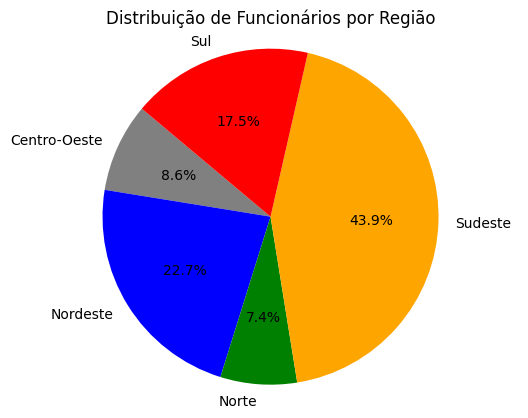

In [5]:
import matplotlib.pyplot as plt

cores = ['grey', 'blue', 'green', 'orange', 'red', 'purple']

qt_regiao = df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

plt.pie(qt_regiao.values, labels=qt_regiao.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Funcionários por Região')
plt.axis('equal')  
plt.savefig('professoresregiao_pizza.png')
plt.show()



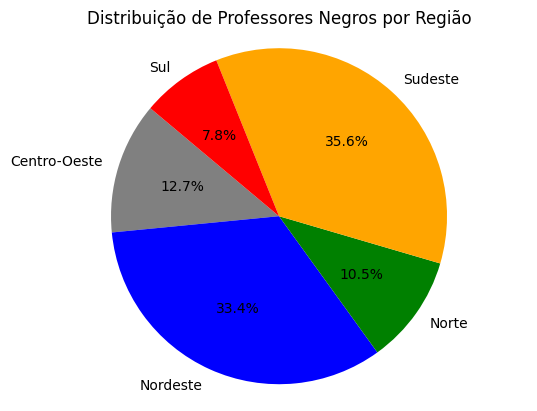

In [9]:
import matplotlib.pyplot as plt

cores = ['grey', 'blue', 'green', 'orange', 'red', 'purple']

doc_pretos = df.groupby('NO_REGIAO_IES')['DOC_EX_PRETA'].sum()

plt.pie(doc_pretos.values, labels=doc_pretos.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores Negros por Região')
plt.axis('equal')  
plt.savefig('professorpreto_pizza.png')
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\bukik\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

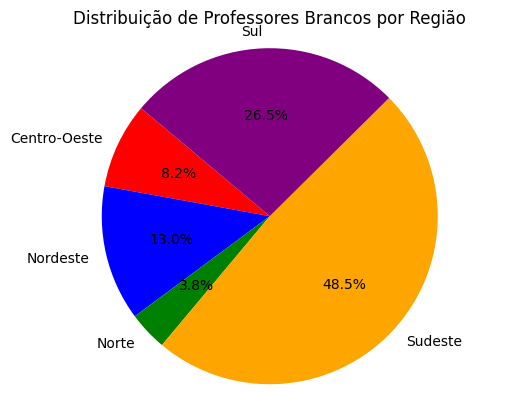

In [11]:
import matplotlib.pyplot as plt

cores = ['red', 'blue', 'green', 'orange', 'purple']  

doc_branca = df.groupby('NO_REGIAO_IES')['DOC_EX_BRANCA'].sum()

plt.pie(doc_branca.values, labels=doc_branca.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores Brancos por Região')
plt.axis('equal')  
plt.savefig('professorbranco_pizza.png')
plt.show()


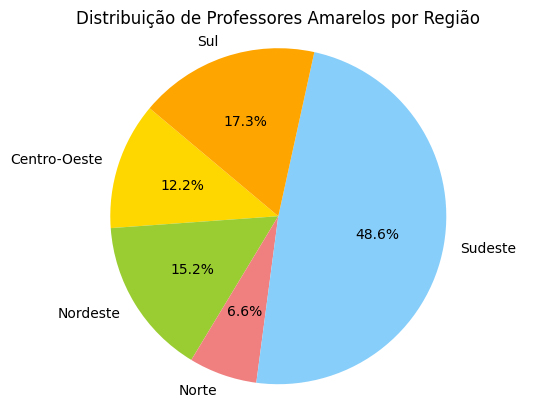

In [12]:
import matplotlib.pyplot as plt

cores = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']  

doc_amarela = df.groupby('NO_REGIAO_IES')['DOC_EX_AMARELA'].sum()

plt.pie(doc_amarela.values, labels=doc_amarela.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores Amarelos por Região')
plt.axis('equal') 
plt.savefig('professoramarelo_pizza.png')
plt.show()


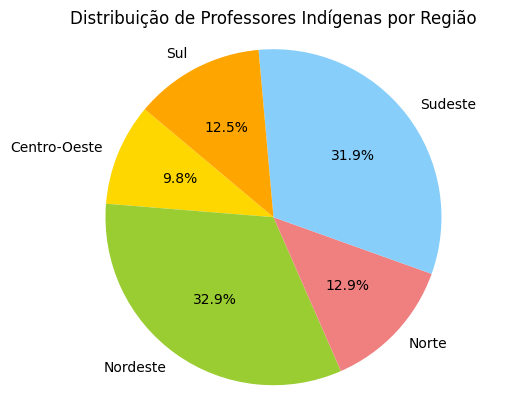

In [13]:
import matplotlib.pyplot as plt

cores = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']  

doc_indigenas = df.groupby('NO_REGIAO_IES')['DOC_EX_INDÍGENA'].sum()

plt.pie(doc_indigenas.values, labels=doc_indigenas.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores Indígenas por Região')
plt.axis('equal')  
plt.savefig('professorigenas_pizza.png')
plt.show()



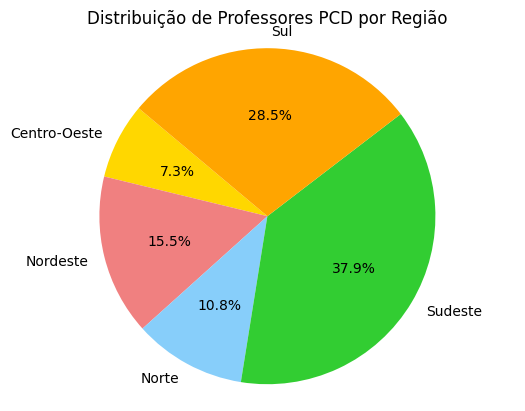

In [14]:
import matplotlib.pyplot as plt

cores = ['gold', 'lightcoral', 'lightskyblue', 'limegreen', 'orange']  

doc_pcd = df.groupby('NO_REGIAO_IES')['DOC_EX_COM_DEFICIÊNCIA'].sum()

plt.pie(doc_pcd.values, labels=doc_pcd.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores PCD por Região')
plt.axis('equal')  
plt.savefig('professorpcd_pizza.png')
plt.show()


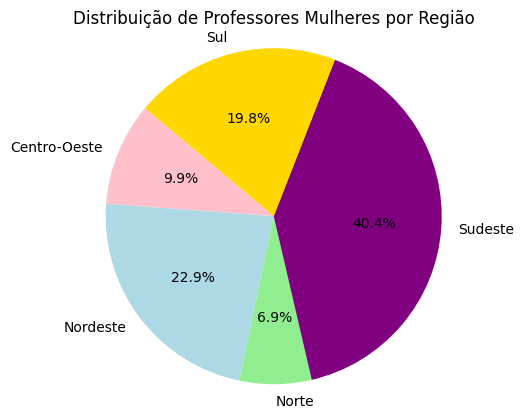

In [15]:
import matplotlib.pyplot as plt

cores = ['pink', 'lightblue', 'lightgreen', 'purple', 'gold'] 

doc_fem = df.groupby('NO_REGIAO_IES')['DOC_EX_FEMI'].sum()

plt.pie(doc_fem.values, labels=doc_fem.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores Mulheres por Região')
plt.axis('equal')  
plt.savefig('professorfem_pizza.png')
plt.show()


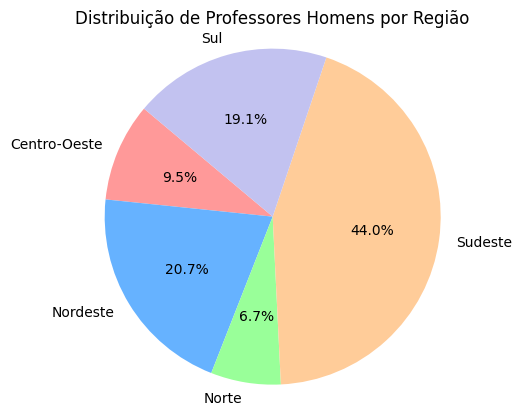

In [17]:
import matplotlib.pyplot as plt


cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#c2f0f0']

doc_masc = df.groupby('NO_REGIAO_IES')['DOC_EX_MASC'].sum()

plt.pie(doc_masc.values, labels=doc_masc.index, colors=cores, autopct='%1.1f%%', startangle=140)

plt.title('Distribuição de Professores Homens por Região')
plt.axis('equal')
plt.savefig('professormasc_pizza.png')
plt.show()




In [20]:
from fpdf import FPDF

# p = retrato, l = paisagem
# mm, cm, in
# a3, a4, a5, letter e legal

pdf = FPDF('P', 'mm', 'A4')
pdf.add_page()

# b, i, u

pdf.set_font('Arial', 'B', 16)

# Título no topo do PDF
titulo_topo = "Trabalho Final de Python - Turma F Sou Kick! - Bianca Carla Martinelli"
pdf.cell(200, 10, align='C', txt=titulo_topo, ln=True)
pdf.ln(10)

pdf.set_font('Arial', 'B', 18)

# Título antes da breve apresentação
titulo_analise = "ANÁLISE DA DESIGUALDADE NA EDUCAÇÃO BRASILEIRA"
pdf.cell(200, 10, align='C', txt=titulo_analise, ln=True)
pdf.ln(5)

pdf.set_font('Arial', '', 12)

# Breve apresentação
apresentacao = "Este PDF apresenta informações sobre diferentes aspectos dos professores por região. Cada seção contém dados específicos sobre professores de diferentes grupos étnicos, gêneros e deficiências."

pdf.multi_cell(0, 10, txt=apresentacao, align='C')
pdf.ln(20)

# Lista de títulos e imagens
titulos = ['Professores por região', 'Professores Brancos', 'Professores Pretos', 'Professores Indígenas', 'Professores Amarelos', 'Professores com Deficiência', 'Professores Homens', 'Professores Mulheres']
imagens = ['img/professoresregiao_pizza.png', 'img/professorbranco_pizza.png', 'img/professorpreto_pizza.png', 'img/professorigenas_pizza.png', 'img/professoramarelo_pizza.png', 'img/professorpcd_pizza.png', 'img/professormasc_pizza.png', 'img/professorfem_pizza.png']

# Largura maior para as imagens
largura_imagem = 150

# Itera sobre os títulos e imagens
for titulo, imagem in zip(titulos, imagens):
    pdf.set_font('Arial', 'B', 14)  # Fonte maior e negrito para os títulos dos gráficos
    pdf.cell(200, 10, align='C', txt=titulo, ln=True)

    # Calcula a posição central para a imagem
    largura_pagina = pdf.w
    posicao_central = (largura_pagina - largura_imagem) / 2
    
    # Calcula a posição de x para a imagem
    x_imagem = pdf.w / 2 - largura_imagem / 2

    # Coloca a imagem centralizada abaixo do título
    pdf.image(name=imagem, x=x_imagem, y=None, w=largura_imagem)

    # Adiciona espaço entre os títulos e imagens
    pdf.ln(10)
    pdf.add_page()  # Adiciona uma nova página

pdf.output('trabalhofinalpython-BiancaMartinelli.pdf')
print("pdf salvo")


pdf salvo
